In [172]:
import pandas as pd
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time

In [157]:
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" 
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" 
#@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url, trainable=True)

In [3]:
def plot_similarity(labels, corr): 
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=90)
  g.set_title("Semantic Textual Similarity")
    

In [52]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",
   

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",
    

    # damaged order
    "Good afternoon, I have just received order ODW2558345 the sun glasses are perfect but the case is damaged and does not shut properly can you please send me a new case that is not damaged",
    "the skirt arrived damaged",
    "I Received a Defective Item",
      
    #order info
    "can you please help me check on the progress of an order i placed on my account?",
    "Can you please check my order status please. i am getting errors from the ups tracking website",
    "My order number is 12345678 but I havn't received it.",   
]

In [57]:
# def sim_approx(texts):

#     input_placeholder = tf.placeholder(tf.string, shape=(None))
#     message_embeddings = embed(input_placeholder)
#     with tf.Session() as session:  
#         session.run(tf.global_variables_initializer())
#         session.run(tf.tables_initializer())
#         message_embeddings_ = session.run(message_embeddings, feed_dict={input_placeholder: texts})
#         #The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.
#         sims = np.inner(message_embeddings_, message_embeddings_)
#     return sims
    


In [158]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [159]:
def sim_approx(texts1, texts2):

    input1 = tf.placeholder(tf.string, shape=(None))
    input2 = tf.placeholder(tf.string, shape=(None))
    encode1 = embed(input1)
    encode2 = embed(input2)
    
    with tf.Session() as session:  
        session.run(tf.global_variables_initializer())
        session.run(tf.tables_initializer())
        emb1, emb2 = session.run([encode1, encode2], feed_dict={input1: texts1, input2: texts2})
        #The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.
        sims = np.inner(emb1, emb2)
    return sims, emb1, emb2
    


In [160]:
def sim_exact(texts1, texts2):
    input1 = tf.placeholder(tf.string, shape=(None))
    input2 = tf.placeholder(tf.string, shape=(None))

    encode1 = tf.nn.l2_normalize(embed(input1), axis=1)
    encode2 = tf.nn.l2_normalize(embed(input2), axis=1)
    cosine_similarities = tf.reduce_sum(tf.multiply(encode1, encode2), axis=1)
    clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
    sim_scores = 1.0 - tf.acos(clip_cosine_similarities)
    
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        session.run(tf.tables_initializer())
  
        emb1, emb2, scores = session.run([encode1, encode2, sim_scores], 
                                         feed_dict={ input1: texts1,
                                                     input2: texts2 })
          
    return scores, emb1, emb2

In [161]:
def sim_exact_cross(texts1, texts2):
    input1 = tf.placeholder(tf.string, shape=(None))
    input2 = tf.placeholder(tf.string, shape=(None))

    encode1 = tf.nn.l2_normalize(embed(input1), axis=1)
    encode2 = tf.nn.l2_normalize(embed(input2), axis=1)
    cosine_similarities = tf.tensordot(encode1, encode2, axes=((1),(1)))
#     cosine_similarities = tf.reduce_sum(vectorsdot, axis=1)
    clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
    sim_scores = 1.0 - tf.acos(clip_cosine_similarities)
    
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        session.run(tf.tables_initializer())
  
        emb1, emb2, scores, vectorsdot = session.run([encode1, encode2, sim_scores, cosine_similarities], 
                                         feed_dict={ input1: texts1,
                                                     input2: texts2 })
          
    return scores, emb1, emb2, cosine_similarities

In [166]:
messages = ["jeans", "denim", "pants", "trousers",
            "package", "parcel", 
            "hot", "cold", 
            "I do not like you", "I love you",
            "The package didn't arrived, what happens with it", "I havn't received my order yet", "My tracking number doesn't work. Can you help?"]

In [167]:
sim_e, emb1e, emb2e = sim_exact(messages, messages)
# plot_similarity(messages, sim_exact)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [168]:
sim_e_c, emb1ec, emb2ec, cosine_similarities_ec = sim_exact_cross(messages, messages)
# plot_similarity(messages, sim_e2)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


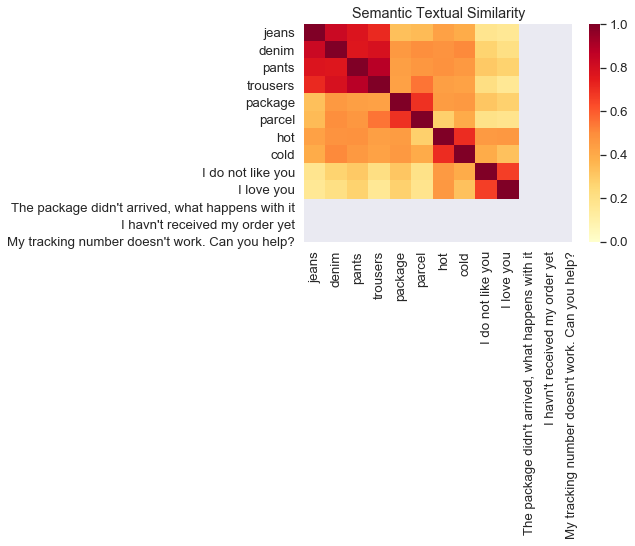

In [169]:
sim_a
plot_similarity(messages, sim_a)

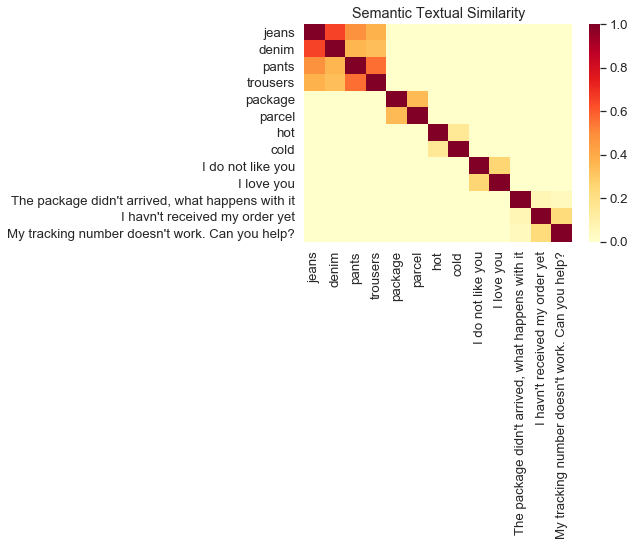

In [170]:
sim_e_c
plot_similarity(messages, sim_e_c)

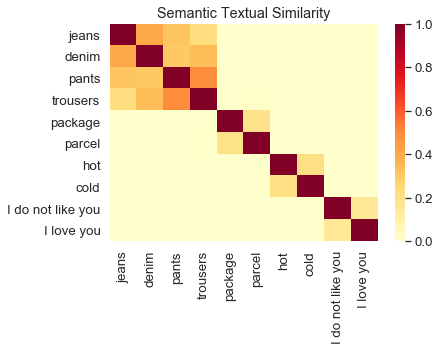

In [150]:
sim_e_c
plot_similarity(messages, sim_e_c)

In [43]:

# pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
# print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
#     pearson_correlation[0], pearson_correlation[1]))

numpy.ndarray